**Importing the Libraries required :**

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

 **Reading the data**

In [126]:
df=pd.read_csv('HousePrices.txt')
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [127]:
df.shape

(1460, 81)

##**Finding the missing values** 

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


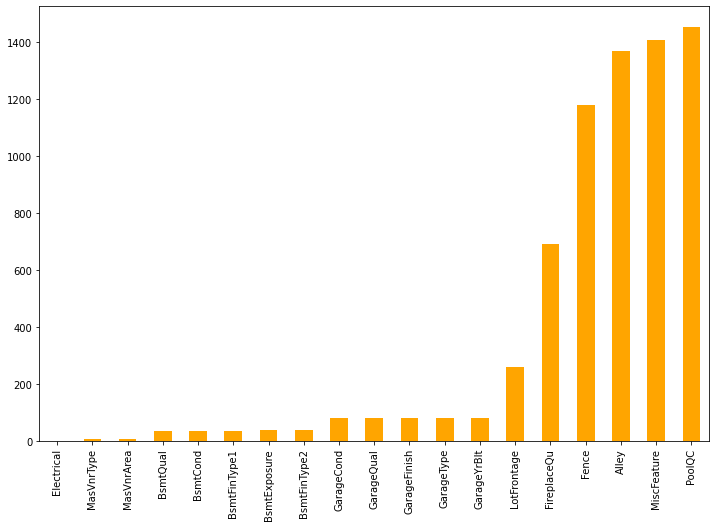

In [128]:
null_values=df.isnull().sum()
null_values=null_values[null_values>0]
null_values.sort_values(inplace=True)
print(null_values)
plt.figure(figsize=(12,8))
null_values.plot.bar(color='orange')
plt.show()

In [129]:
drop_values=['Id','Fence','Alley','MiscFeature','PoolQC']
df.drop(drop_values,axis=1,inplace=True)
df.shape

(1460, 76)

In [130]:
cat_feature = df.select_dtypes(include='object').columns
print(cat_feature)
num_feature = df.select_dtypes(exclude='object').columns
print(num_feature)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'Ga

In [131]:
cat_length=len(cat_feature)
num_length=len(num_feature)
print('Number of Categorical Features in dataset:',cat_length)
print('Number of Numerical Features in dataset:', num_length) 
print('Total Features in dataset:', cat_length+num_length)

Number of Categorical Features in dataset: 39
Number of Numerical Features in dataset: 37
Total Features in dataset: 76


##### In the NUMERICAL FEATURES we have date data 
##### we will now see how these features will impact on salesprice of the house 

In [132]:
date_features=[feature for feature in num_feature if 'Yr' in feature or 'Year' in feature]
print(date_features)
for feature in date_features:
  print('\n')
  print(feature)
  print('\n')
  print(df[feature].unique())
  print('\n')

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


YearBuilt


[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]




YearRemodAdd


[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]




GarageYrBlt


[2003. 1976. 2

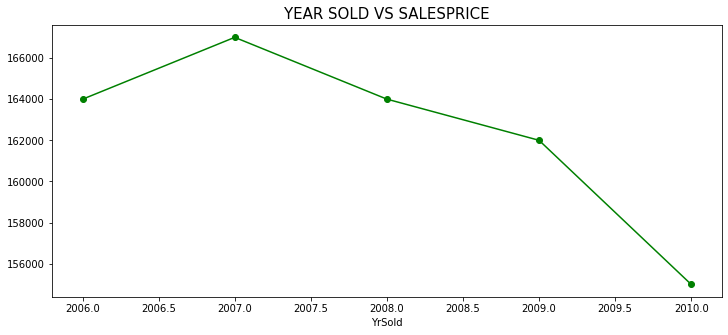

In [133]:
plt.figure(figsize=(12,5))
df.groupby('YrSold')['SalePrice'].median().plot(marker='o',color='green')
plt.title('YEAR SOLD VS SALESPRICE',fontsize=15)
plt.show()

**As years are increasing the saleprice of the house is decresaing**

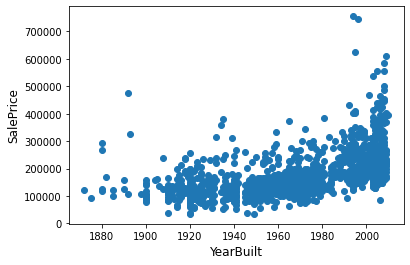

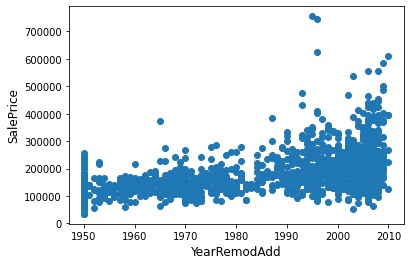

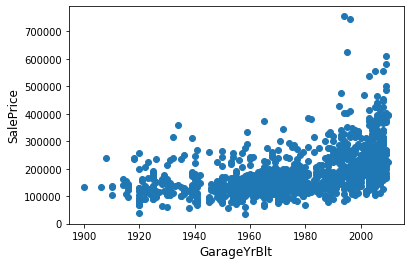

In [134]:
for columns in date_features:
    if columns != 'YrSold':
        plt.scatter(df[columns],df['SalePrice'])
        plt.xlabel(columns,fontsize=12)
        plt.ylabel('SalePrice',fontsize=12)
        plt.show()

#### **The above scatterplot shows that the GarageYrBlt, YearRemodAdd,YearBuilt the salesprice is high and the price of the old house is getting decreased**

In [135]:
for columns in num_feature:
    print(columns, df[columns].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual [ 7  6  8  5  9  4 10  3  1  2]
OverallCond [5 8 6 7 4 2 3 9 1]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1

In [136]:
#descrete features
disc_feature= [columns for columns in num_feature if len(df[columns].unique()) <= 20 and columns not in date_features]
print(disc_feature)
print("Total Discrete Features in test dataset : ", len(disc_feature))

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Total Discrete Features in test dataset :  15


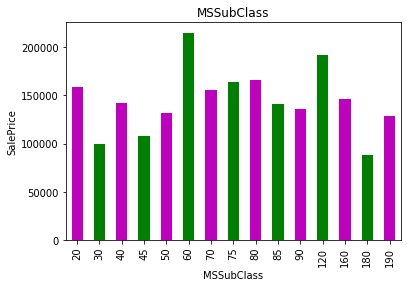

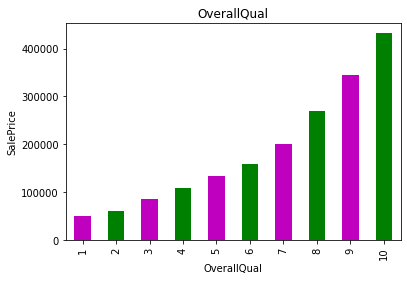

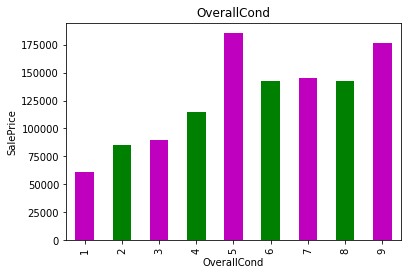

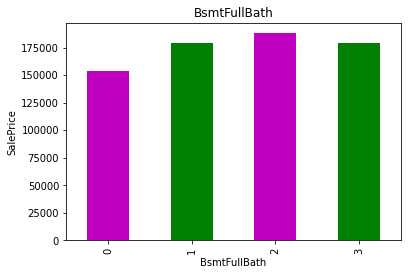

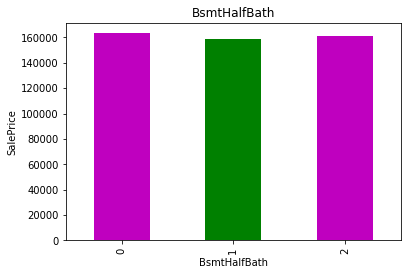

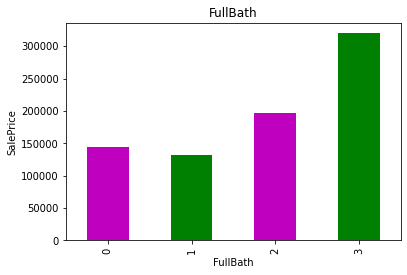

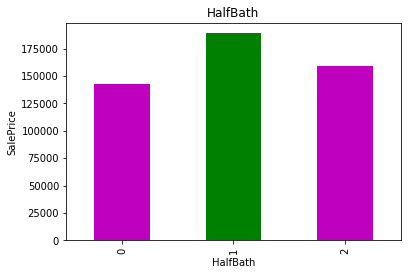

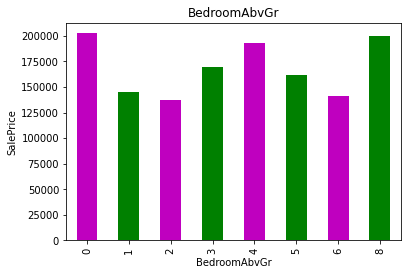

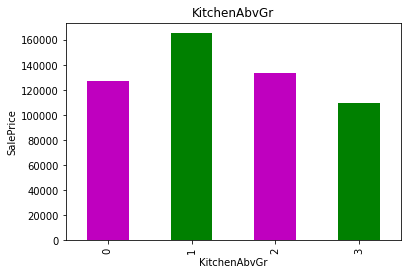

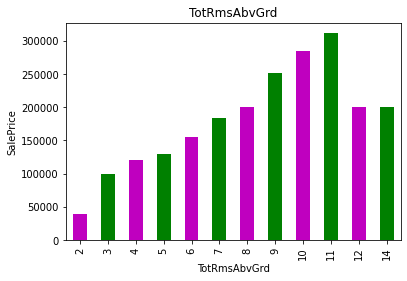

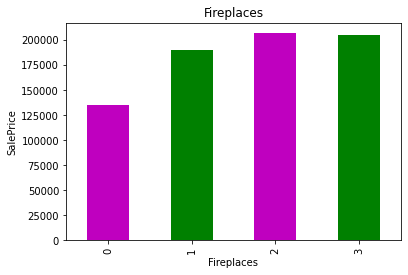

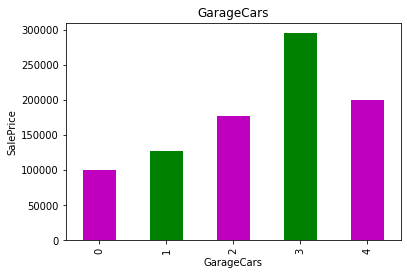

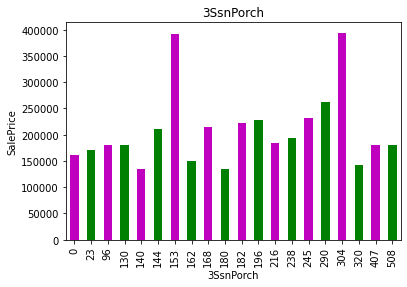

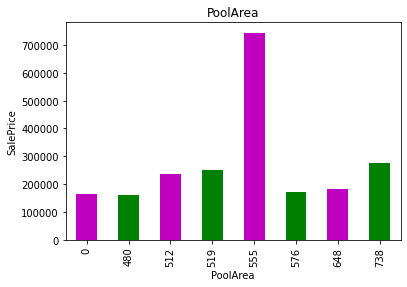

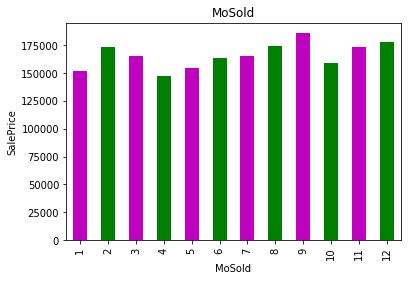

In [137]:
for columns in disc_feature:
    df.groupby(columns)['SalePrice'].median().plot.bar(color=['m','g'])
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.title(columns)
    plt.show()

***The above plot shows the features like Fireplaces, Fullbath , overallcond have good influence on saleprice(TARGET FEATURE) ***

In [138]:
#contionous features
cont_feature = [columns for columns in num_feature if columns not in disc_feature+date_features]
print(cont_feature)
print('Total Continuous Features', len(cont_feature))

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']
Total Continuous Features 18


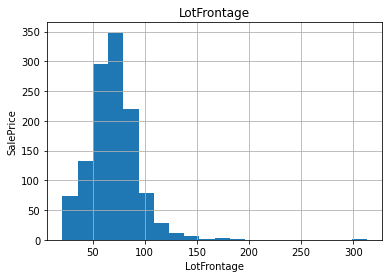

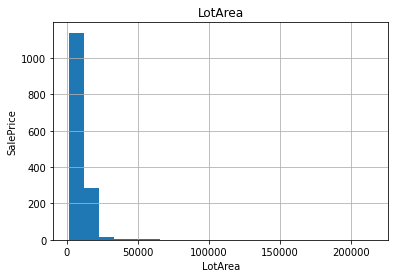

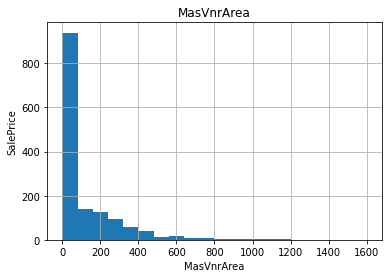

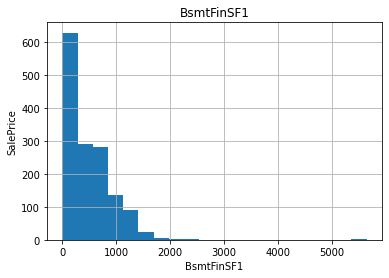

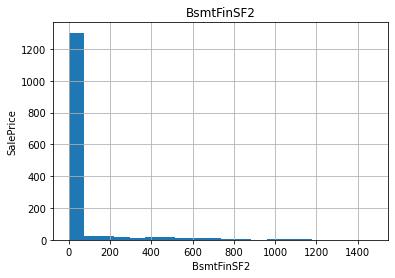

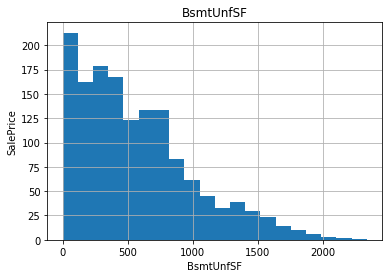

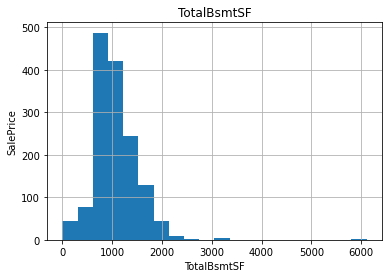

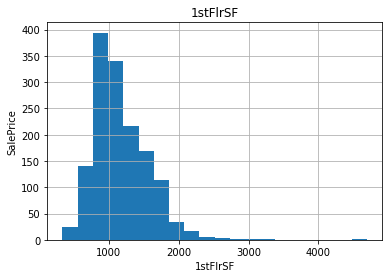

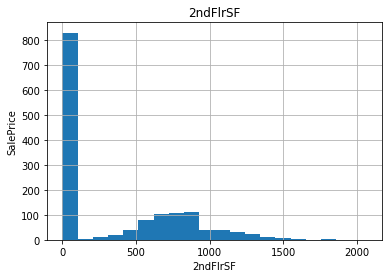

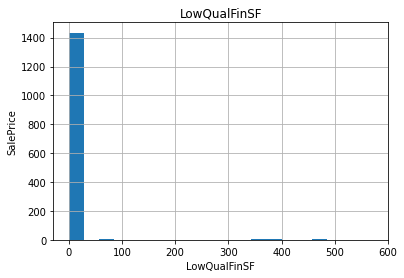

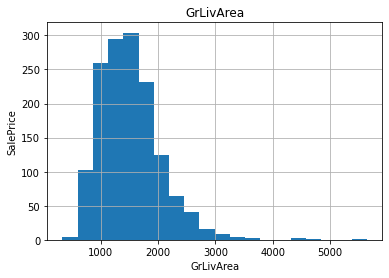

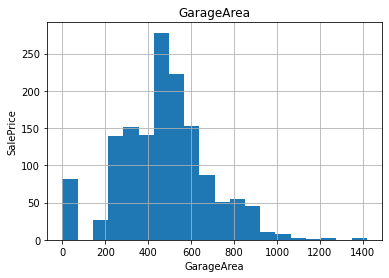

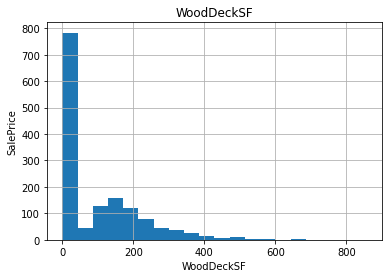

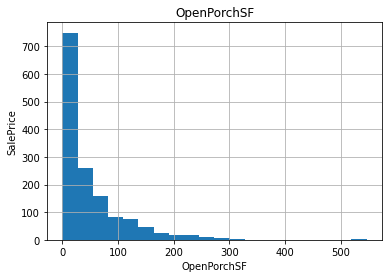

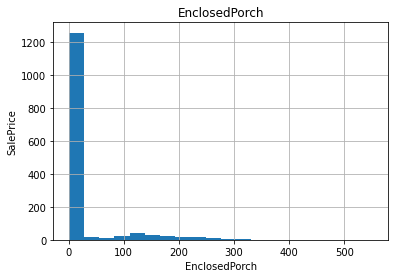

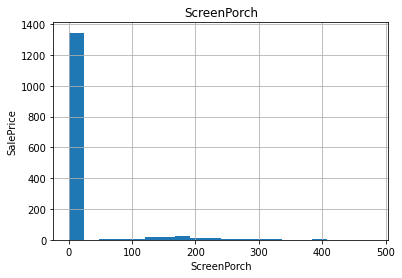

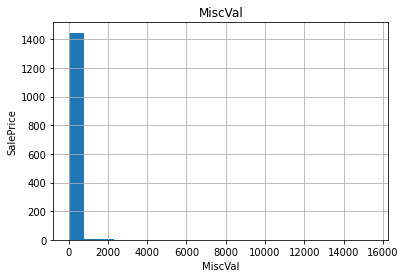

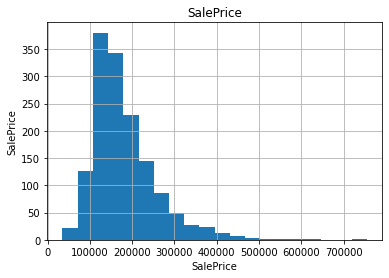

In [139]:
for columns in cont_feature:
    df[columns].hist(bins = 20)
    plt.xlabel(columns)
    plt.ylabel('SalePrice')
    plt.title(columns)
    plt.show()

***Many features seems to be skewed ***

In [140]:
for feature in cat_feature:
  print(feature,df[feature].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

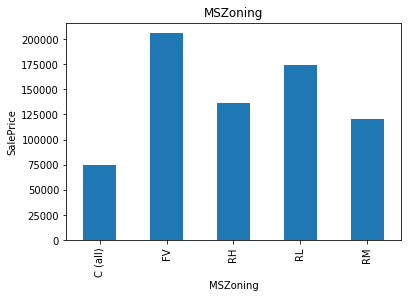

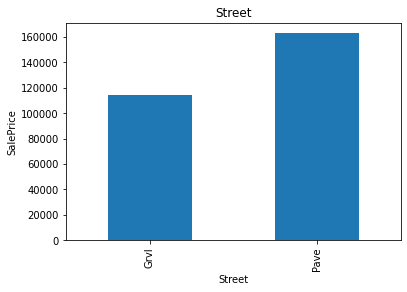

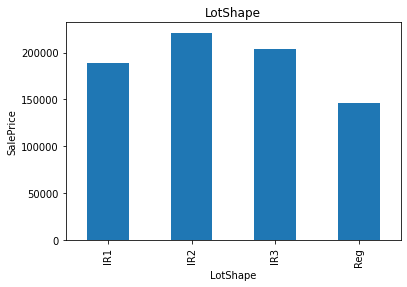

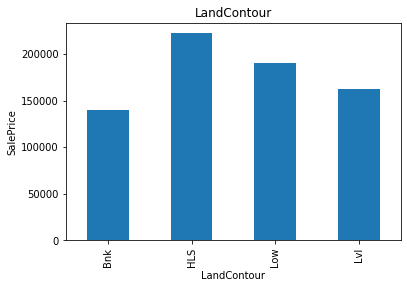

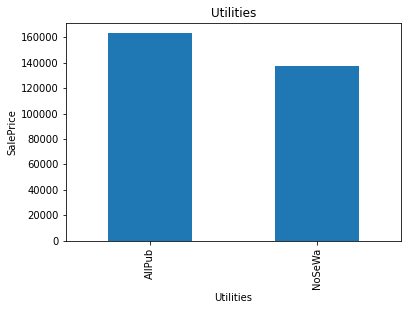

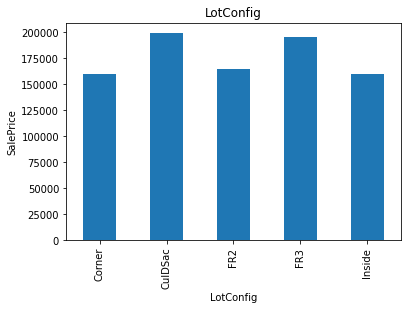

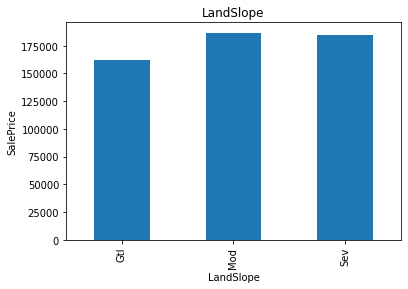

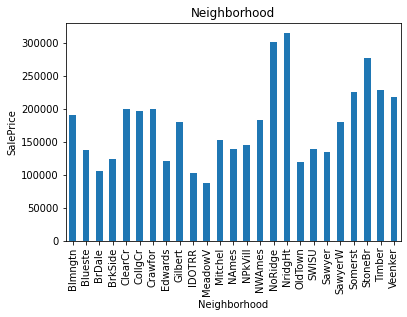

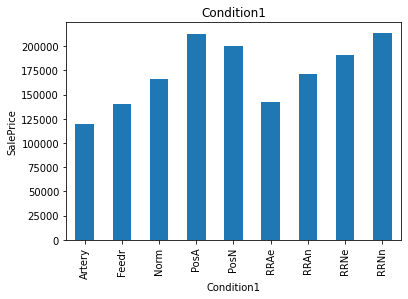

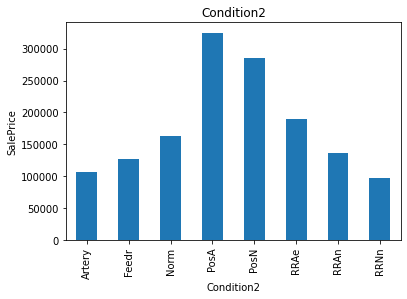

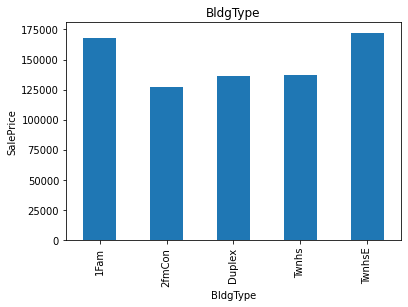

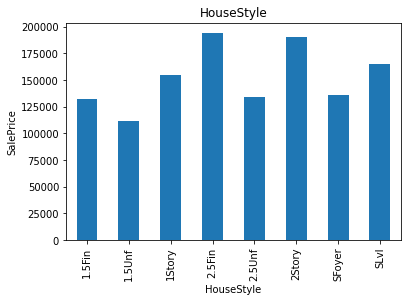

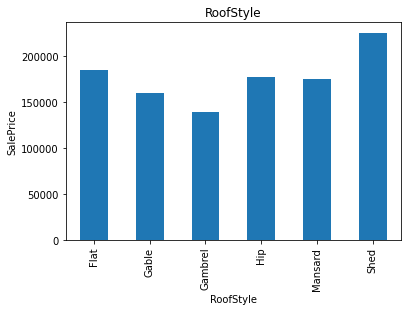

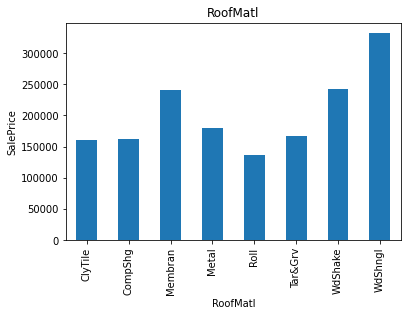

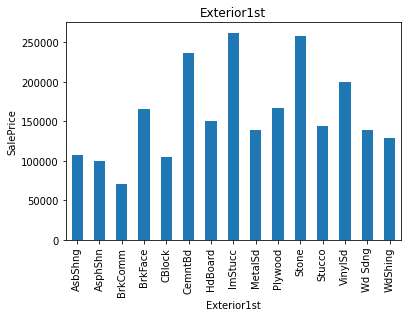

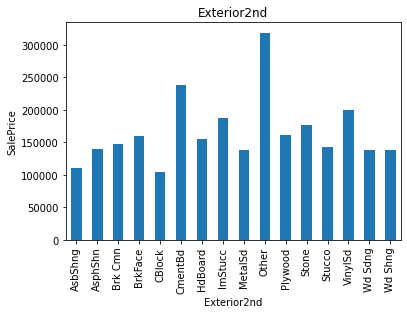

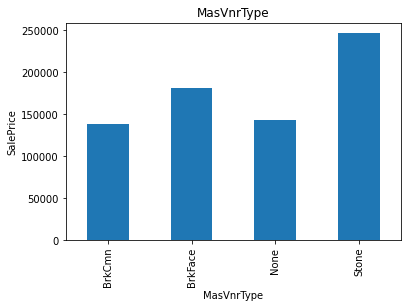

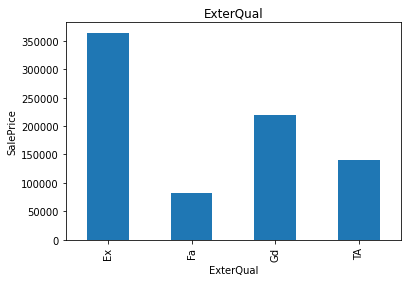

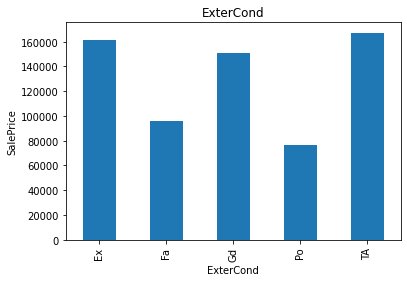

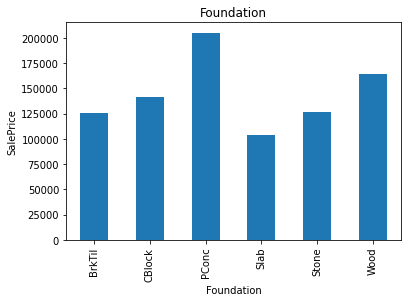

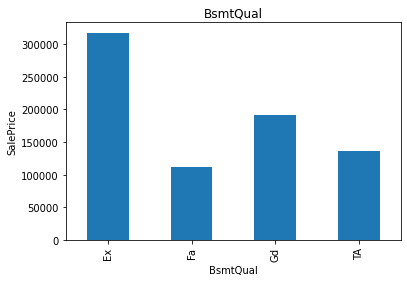

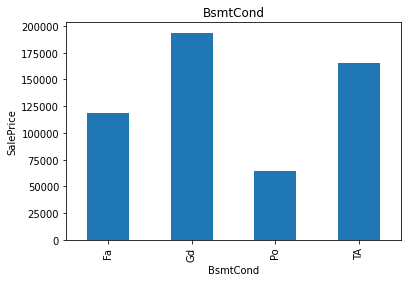

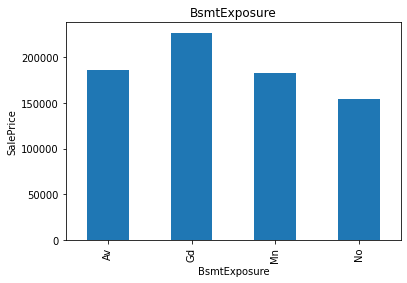

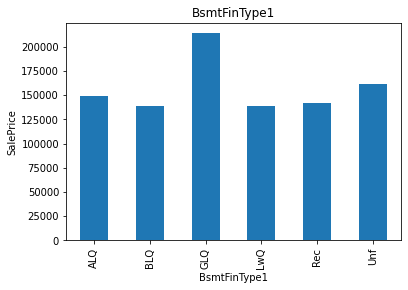

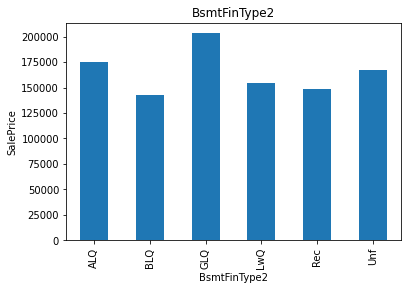

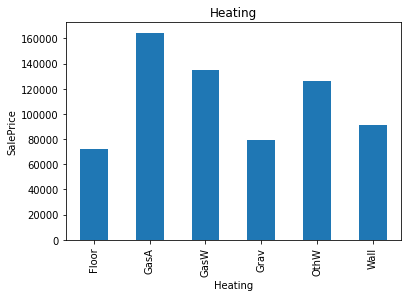

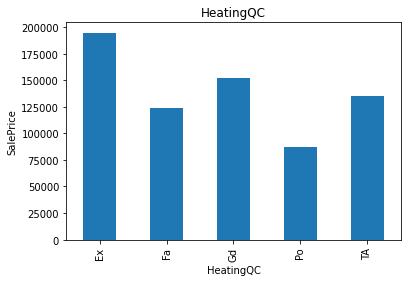

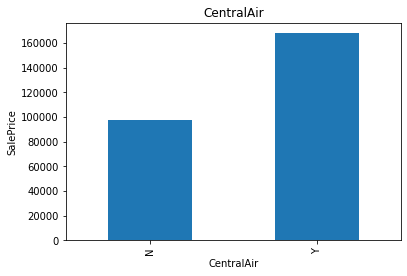

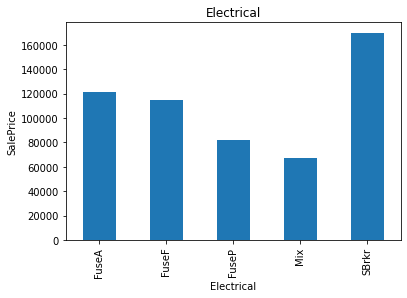

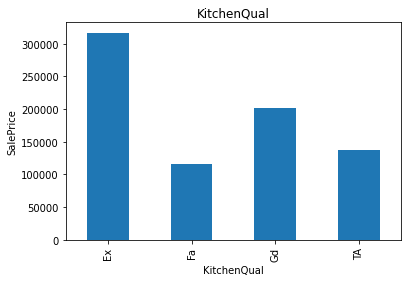

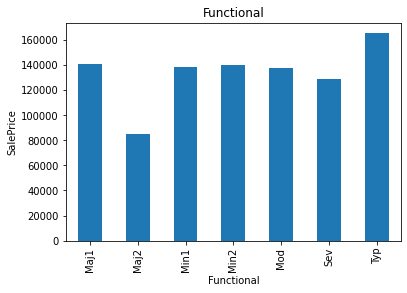

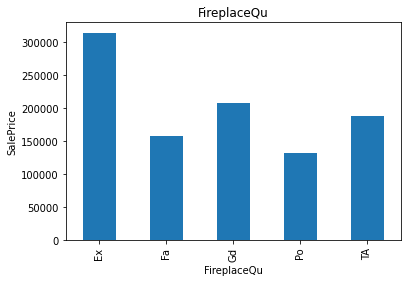

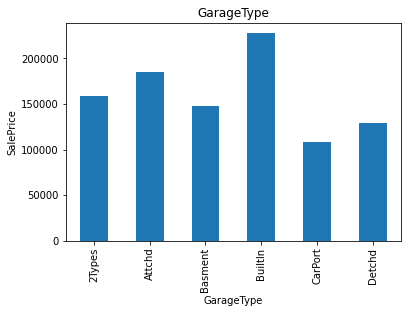

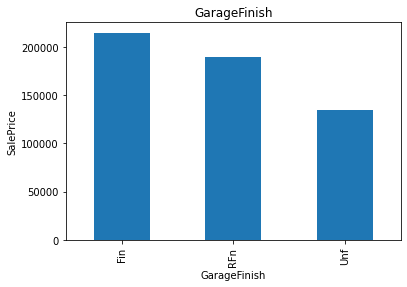

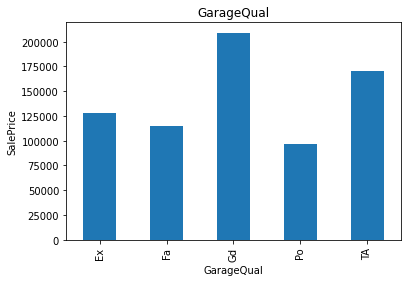

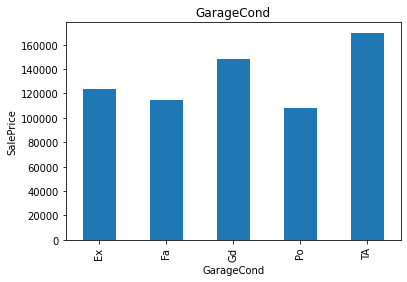

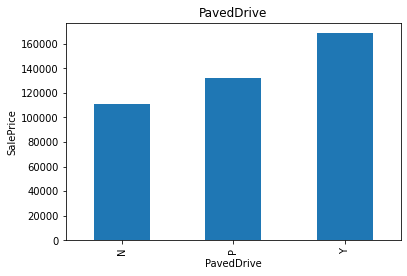

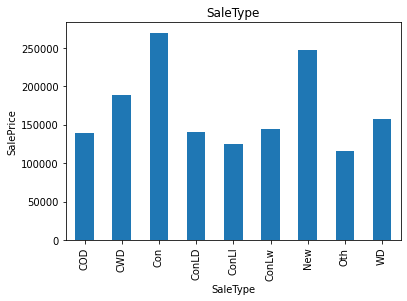

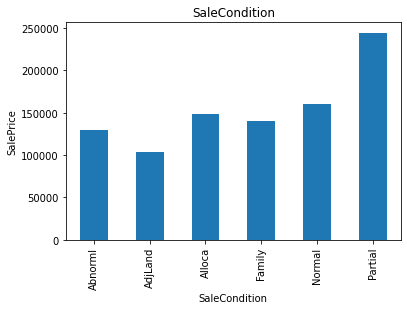

In [141]:
for feature in cat_feature:
  df.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

In [142]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

In [143]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [144]:
#Numerical features have outliers so filling nan-values with median
for col in num_feature:
    if col in null_values and col not in date_features:
        df[col] = df[col].fillna(df[col].median())
    else:
        pass

In [145]:
#Date features have outliers so filling nan-values with median
for col in date_features:
    if col in null_values:
        df[col] = df[col].fillna(df[col].median())
    else:
        pass

In [146]:
for col in date_features:
    if col != 'YrSold':
        df[col] = df['YrSold'] - df[col]
    else:
        pass

In [147]:
#Catagorical feature with mode
for col in cat_feature:
    if col in null_values:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        pass

In [148]:
#checking for null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

# **Feature Encoding**

In [149]:
from sklearn.preprocessing import LabelEncoder
for c in cat_feature:
    lbl = LabelEncoder()
    lbl.fit(df[c].values)
    df[c] = lbl.transform(df[c].values)

# **Correlation of all features wrt saleprice**

In [150]:
#Checking the correlation of all features with SalePrice and sorting them with value
cols =df[df.columns].corr()['SalePrice']
print(cols.sort_values(ascending = False).drop_duplicates)

<bound method Series.drop_duplicates of SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
YearBuilt      -0.523350
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, Length: 76, dtype: float64>


**Applying log on categorical features**

In [151]:
for col in cont_feature:
    if 0 in df[col].unique():
        pass
    else:
        df[col]=np.log(df[col])

In [152]:
corr=df.corr()

corr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.477364,-0.462668,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,-0.028746,-0.041968,-0.117817,-0.031336,-0.089159,-0.137229,-0.029850,0.023573,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,-0.069836,0.041195,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.288607,0.307886,0.046474,0.081717,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.033443,0.090719,-0.082451,0.012301,-0.040110,-0.098672,0.007630,0.002927,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.073959
MSZoning,0.035900,1.000000,-0.132310,-0.098816,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,0.307520,0.173441,-0.000301,0.005133,-0.008558,0.006963,-0.028279,-0.062830,0.200536,-0.096041,-0.235174,0.128245,-0.010528,0.037209,0.024688,-0.049128,-0.031718,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.061582,-0.051481,0.011520,-0.103578,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.009943,0.116007,0.262217,0.167501,-0.157042,-0.189250,-0.150802,-0.083272,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.188860
LotFrontage,-0.477364,-0.132310,1.000000,0.653416,-0.034299,-0.157327,-0.051420,0.002895,-0.169801,0.060018,0.106366,0.000940,0.002908,-0.532315,-0.018354,0.204398,-0.031360,-0.086305,-0.058585,0.163180,0.066951,0.100773,0.135639,-0.029418,0.140183,-0.160906,0.036713,0.091300,-0.135492,0.048796,-0.106034,-0.008545,0.166011,-0.027024,0.038405,0.140659,0.328387,-0.017877,-0.075503,0.052940,0.037393,0.422404,0.046298,0.024590,0.320432,0.066103,-0.002510,0.162890,0.015991,0.267471,0.013833,-0.162261,0.319206,0.039469,0.224109,0.072712,-0.224425,-0.038714,-0.206878,0.272562,0.317183,0.035923,0.027529,0.078044,0.088199,0.122983,0.018190,0.063526,0.051054,0.107592,0.011237,0.019995,0.004364,-0.023457,0.063665,0.345755
LotArea,-0.462668,-0.098816,0.653416,1.000000,-0.105723,-0.285425,-0.104666,0.023403,-0.187106,0.255881,0.104687,0.058578,0.028729,-0.564935,-0.045572,0.178215,-0.006305,-0.023095,-0.029424,0.142942,0.173382,0.085403,0.103894,-0.007293,0.122350,-0.107621,-0.003444,0.019089,-0.100212,-0.006767,-0.146220,-0.028393,0.230969,-0.062491,0.092214,0.077247,0.351838,0.000072,-0.038262,0.057671,0.030284,0.467465,0.080465,0.012810,0.385435,0.138273,0.045218,0.179187,0.038717,0.279176,0.001678,-0.115271,0.360129,-0.010965,0.327754,0.092138,-0.190974,0.020146,-0.170305,0.272007,0.322045,0.014904,0.018301,0.023293,0.199846,0.147224,0.010951,0.055700,0.097381,0.091791,0.047791,0.010521,-0.027164,-0.002437,0.053602,0.399918
Street,-0.024969,0.087654,-0.034299,-0.105723,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,-0.011561,-0.071657,0.002039,-0.018243,0.023704,0.058823,0.042848,-0.022203,-0.067091,-0.019732,0.008081,0.002505,0.006166,0.010007,0.017108,0.049976,0.005874,

**PCA for dimensionality reduction**

In [153]:
x = df.iloc[:, 0: -1]
y = df.iloc[:, -1]

In [154]:
x = StandardScaler().fit_transform(x)

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PCA1', 'PCA2','PCA3','PCA4','PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10'])

In [156]:
principalDf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,2.178970,-0.736178,-1.784876,0.978105,-1.167884,0.834860,0.160649,-0.962252,-1.745519,0.929301
1,0.370252,-0.642560,2.363384,0.835843,-0.881639,-0.407741,-1.347149,-0.294082,0.097970,-1.252506
2,2.759398,-0.418827,-1.112393,1.243054,-1.865515,0.749945,0.784060,-0.817605,-0.473476,-0.386271
3,-1.267653,1.724442,0.209476,0.473498,-0.502853,1.900285,-0.304699,0.062055,-0.395169,1.376548
4,5.114176,1.263052,-0.369072,1.847299,-1.198225,0.698346,0.714272,-0.894772,-0.471826,0.093567


In [157]:
finalDf = pd.concat([principalDf, df[['SalePrice']]], axis = 1)

In [158]:
finalDf.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,SalePrice
0,2.178970,-0.736178,-1.784876,0.978105,-1.167884,0.834860,0.160649,-0.962252,-1.745519,0.929301,12.247694
1,0.370252,-0.642560,2.363384,0.835843,-0.881639,-0.407741,-1.347149,-0.294082,0.097970,-1.252506,12.109011
2,2.759398,-0.418827,-1.112393,1.243054,-1.865515,0.749945,0.784060,-0.817605,-0.473476,-0.386271,12.317167
3,-1.267653,1.724442,0.209476,0.473498,-0.502853,1.900285,-0.304699,0.062055,-0.395169,1.376548,11.849398
4,5.114176,1.263052,-0.369072,1.847299,-1.198225,0.698346,0.714272,-0.894772,-0.471826,0.093567,12.429216


In [159]:
#Preparing the data for training
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

**Model Building**

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [161]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=9)

In [162]:
clf=LinearRegression()
reg=clf.fit(X_train, y_train)
predictions = reg.predict(X_test)
print('MSE : ',mean_squared_error(y_test,predictions))
print('R2_score:',r2_score(y_test,predictions))

MSE :  0.015798296763809384
R2_score: 0.9053362866645993


In [163]:
Result=pd.DataFrame([y_test,predictions],index=['ACTUAL','PREDICTED'])
Result.transpose()

,ACTUAL,PREDICTED
0,11.927681,12.134653
1,12.394625,12.307365
2,11.314475,11.383378
3,11.995352,12.026503
4,11.849398,11.870493
...,...,...
433,11.884489,11.866227
434,11.289782,11.311499
435,12.577636,12.592310
436,12.078239,12.041771
